# Chapter1

## 1.1 수학과 파이썬 복습

- 벡터 : 열벡터, 행벡터

### 1.1.1 벡터와 행렬

In [1]:
import numpy as np

x = np.array([1,2,3])
print(x.__class__) #클래스 이름 표시
print(x.shape) # 배열의 형상을 담고 있음
print(x.ndim) # 차원수를 담고 있음

W = np.array([[1,2,3],[4,5,6]])
print(W.shape)
print(W.ndim)

<class 'numpy.ndarray'>
(3,)
1
(2, 3)
2


### 1.1.2 행렬의 원소별 연산

In [2]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])

print(W+X)
print(W*X)

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


In [7]:
x.reshape(-1,3)

array([[1, 2, 3]])

### 1.1.3 브로드캐스트

- 형상이 다른 배열이라도 연산 가능
- 해당 shape 만큼 다른 배열이 복사되어 연산

In [8]:
A = np.array([[1,2],[3,4]])
A*10 # 1x1 배열이 2x2로 복사

array([[10, 20],
       [30, 40]])

In [10]:
A = np.array([[1,2],[3,4]])
b = np.array([10,20]) # 1x2 행렬이 2x2로 복사
A*b

array([[10, 40],
       [30, 80]])

### 1.1.4 벡터의 내적과 행렬의 곱

In [11]:
# 벡터의 내적
a = np.array([1,2,3])
b = np.array([4,5,6])
print(np.dot(a,b))

# 행렬의 곱
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
print(np.matmul(A,B)) # 행렬의 곱에도 np.dot 연산 가능

32
[[19 22]
 [43 50]]


### 1.1.5 행렬 형상 확인
- 행렬의 곱에서는 대응하는 차원의 원소수가 같아야 하고, 앞의 행렬의 행이 결과 행렬의 행이, 뒤의 행렬이 열이 결과 행렬의 열이 됨

## 1.2 신경망의 추론

- input layer
- hidden layer
- output layer
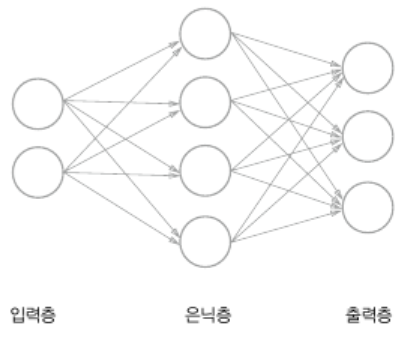
- 화살표에는 weight와 bias가 존재, 각 layer안에 activation fuction이 적용됨
- weight를 지니는 층은 2개뿐이기 때문에 2층 신경망(경우에 따라서는 3층이라고 하기도 함)
- 완전연결계층 : 인접하는 모든 계층과 이어져있기 때문

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [14]:
x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x,W1) + b1
a = sigmoid(h)
s = np.matmul(a,W2) + b2 # 맨 마지막 층은 activation 적용해도 되고 안해도 됨.

#### *Activation function 의 역할*
- 선형으로 분리할 수 없는 많은 문제가 있음 but,
- 아무리 층을 쌓더라도 선형결합으로만 이루어진 신경망은 결국 선형결합
- 비선형 함수(sigmoid, tanh, relu...)를 적용하고 층을 많이 쌓음으로써 비선형분류
    - 만약 층을 여러개 쌓지 않으면 비선형함수를 적용하더라도 선형결합일 수 있음

### 1.2.2 계층으로 클래스화 및 순전파 구현

In [21]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        return 1/(1+np.exp(-x))
    
class Affine:
    def __init__(self, W, b):
        self.params = [W,b]
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [22]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O  = input_size, hidden_size, output_size # feature
        
        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # 모든 가중치를 리스트에 모은다.(학습해야할 파라미터)
        # activation function의 가중치는 없기([]) 때문에 저장되지 않음
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x) # 직전 layer의 출력이 바로 다음 layer의 입력
        return x

In [23]:
x = np.random.randn(10,2) # 여기서 10은 data 개수
model = TwoLayerNet(2,4,3)
s = model.predict(x)